# Versuch 256 - Röntgenfluoreszenz

## Teil 1: K-alpha-Linien

In [39]:
# Importieren der Module
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [71]:
Z, E, sigmaE, sqE, dsqE =np.loadtxt('/Users/Peter/Desktop/Python-Kurs/256tab1.txt', skiprows=3, usecols=(1,2,3,4,5), unpack=True)

In [72]:
# Definition der Ausgleichsgerade y=f(x)
def gerade(Z, A, s): 
    return A*(Z-s) * np.sqrt(3/4)


popt, pcov = curve_fit(gerade, Z, sqE)
print(popt)
perr = np.sqrt(np.diag(pcov))
print(perr)

[ 0.11982662  1.75388292]
[ 0.00074885  0.20198161]


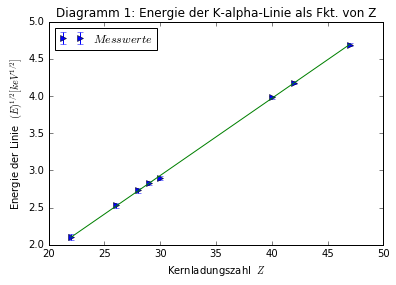

In [73]:
plt.errorbar(Z, sqE, linestyle='None', marker='>', label='$Messwerte$', yerr=dsqE)
plt.plot(Z, gerade(Z, *popt))
plt.xlabel('Kernladungszahl  $Z$')
plt.ylabel('Energie der Linie  $(E)^{1/2} [keV^{1/2}]$')
plt.title('Diagramm 1: Energie der K-alpha-Linie als Fkt. von Z')
plt.legend(loc='best')
plt.savefig('256 Diagramm 1.png', dpi=300)

In [74]:
chisquare=np.sum(((gerade(Z, *popt)-sqE)**2/dsqE**2))
dof=2
chisquare_red=chisquare/dof
print (chisquare)
print(chisquare_red)

1.75801698501
0.879008492505


In [75]:
# Berechne Fitwahrscheinlichkeit
from scipy.stats import chi2

prob=round(1-chi2.cdf(chisquare,dof),2)*100
print(prob)

42.0


## Teil 2: K-beta-Linien 

In [76]:
Z, E, sigmaE, sqE, dsqE =np.loadtxt('/Users/Peter/Desktop/Python-Kurs/256tab1.txt', skiprows=4, usecols=(1,6,7,8,9), unpack=True)

In [77]:
# Definition der Ausgleichsgerade y=f(x)
def gerade(Z, A, s): 
    return A*(Z-s) * np.sqrt(8/9)


popt, pcov = curve_fit(gerade, Z, sqE)
print(popt)
perr = np.sqrt(np.diag(pcov))
print(perr)

[ 0.1167135   1.84263649]
[ 0.00039666  0.11421551]


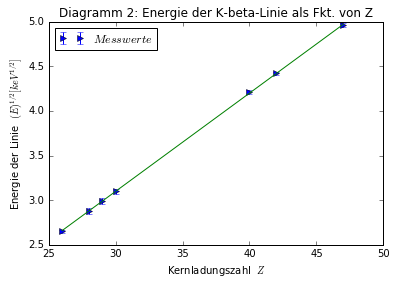

In [78]:
plt.errorbar(Z, sqE, linestyle='None', marker='>', label='$Messwerte$', yerr=dsqE)
plt.plot(Z, gerade(Z, *popt))
plt.xlabel('Kernladungszahl  $Z$')
plt.ylabel('Energie der Linie  $(E)^{1/2} [keV^{1/2}]$')
plt.title('Diagramm 2: Energie der K-beta-Linie als Fkt. von Z')
plt.legend(loc='best')
plt.savefig('256 Diagramm 2.png', dpi=300)

In [79]:
chisquare=np.sum(((gerade(Z, *popt)-sqE)**2/dsqE**2))
dof=2
chisquare_red=chisquare/dof
print (chisquare)
print(chisquare_red)

0.701515516143
0.350757758071


In [80]:
# Berechne Fitwahrscheinlichkeit
from scipy.stats import chi2

prob=round(1-chi2.cdf(chisquare,dof),2)*100
print(prob)

70.0
